<a href="https://colab.research.google.com/github/IA6-5-21/ModelTraining/blob/main/level_measurement_fastai_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai==2.2.5 -q

     |████████████████████████████████| 194kB 6.7MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 236kB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
  import fastai
print(fastai.__version__ ) # should be 2.2.5
from fastai.vision.all import *

2.2.5


In [ ]:
def label_func(fn): 
  return path/'Maske'/f'{fn.stem}_P.png'

In [ ]:
path = Path("/content/drive/MyDrive/FastAi")

In [ ]:
dls=SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"Images"),
    label_func = label_func,#lambda o: path/'Labels/GrayLabels'/f'{o.stem}_P.png',
    codes=np.loadtxt(Path('/content/drive/MyDrive/FastAi/codes.txt'),dtype=str),
    item_tfms=Resize(200))
    #batch_tfms=aug_transforms(size=(128,96)))

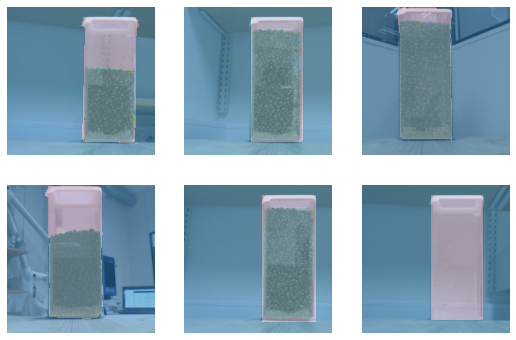

In [ ]:
dls.show_batch(max_n=6)

In [ ]:
def accuracy(input, target):
    target = target.squeeze(1)
    #mask = target != void_code
    return (input.argmax(dim=1)==target).float().mean()

In [ ]:
learn = unet_learner(dls,resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
#learn.lr_find()

In [ ]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,accuracy,time
0,5.402820,4.606716,0.041296,00:22
1,4.440103,2.904899,0.639715,00:05
2,3.546271,1.679398,0.678100,00:05
3,2.730164,1.030726,0.801192,00:05
4,2.111015,1.285618,0.711349,00:05
5,1.675653,0.582961,0.788710,00:05
6,1.336762,0.637255,0.802897,00:05
7,1.078428,0.395307,0.838825,00:05
8,0.877504,0.403395,0.843286,00:05
9,0.722341,0.406296,0.845549,00:05


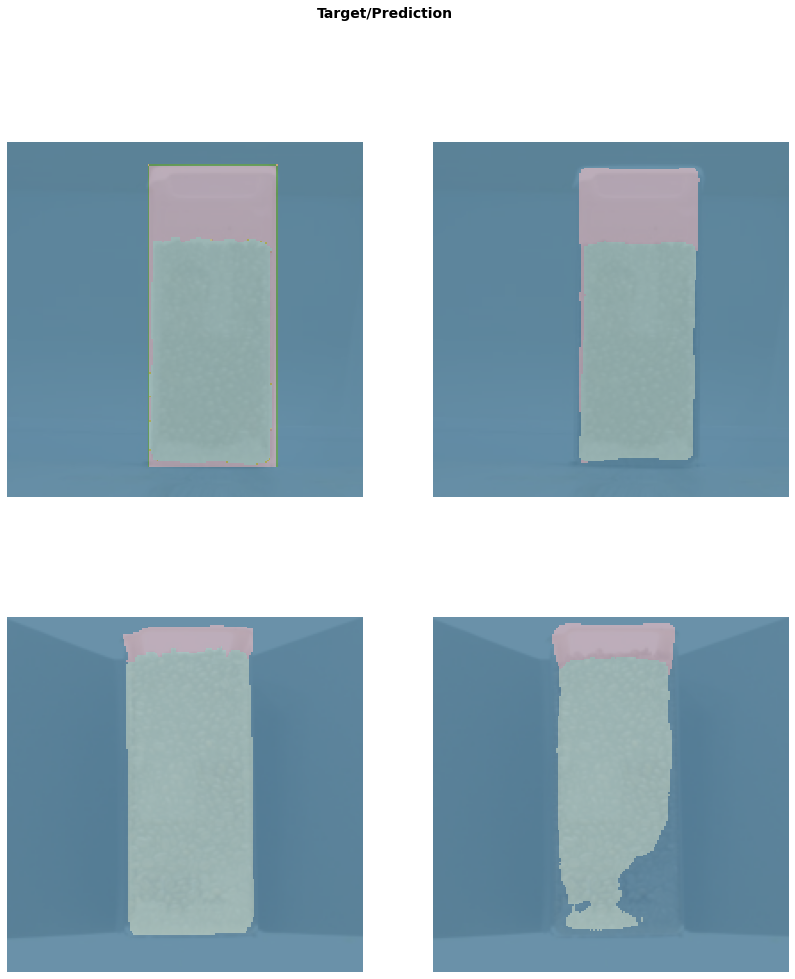

In [ ]:
learn.show_results(max_n=6, figsize=(14,16),shuffle=true)

In [ ]:
image = Path("/content/drive/MyDrive/FastAi/Test/Test10.jpg")
prediction = learn.predict(image)

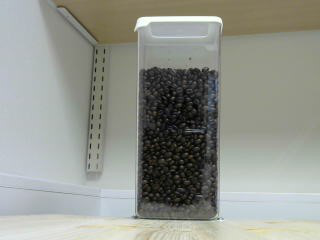

In [ ]:
img = Image.open(image)
img

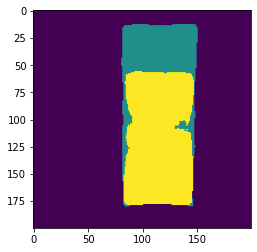

In [ ]:
plt.imshow(prediction[0])

In [ ]:
def findContainerEdges(slices):
  i=100
  j=0
  k=199
  l=199
  while slices[i][j]==0:#Looks for the first non-black pixel from the left
    leftEdge=j
    j+=1
  while slices[i][k]==0:#Looks for the first non-black pixel from the right
    rightEdge=k
    k-=1
  m=int(((rightEdge-leftEdge)/2) + leftEdge)#Looks for the first white pixel from the bottom
  while slices[l][m]!=255:
    bottomEdge=l
    l-=1
  return {"leftEdge":leftEdge+10, "rightEdge":rightEdge-10,"bottomEdge":bottomEdge}

In [ ]:
def findCoffeeLevel(edges):
  coffee = 0
  notCoffee = 0
  total=0 
  coffeeLevel=0
  leftEdge=edges["leftEdge"]
  rightEdge=edges["rightEdge"]
  bottomEdge=edges["bottomEdge"]
  for i in range(0,bottomEdge): #bredde
    for j in range(leftEdge,rightEdge): #Høyde
      if(lines[i][j]==255): #Hvit/Kaffe
       coffee=coffee+1
      elif(lines[i][j]==127): #Gray/Container
       notCoffee = notCoffee+1
      total=total+1
      if coffee!=0:
       coffeeLevel = round((coffee/(coffee + notCoffee))*100,1)
  return coffeeLevel

In [ ]:
lines = prediction[0]
edges = findContainerEdges(lines)
coffeeLevel = findCoffeeLevel(edges)

print(f"coffeeLevel: {coffeeLevel}%")

coffeeLevel: 73.1%


In [ ]:
#learn.save("LevelFinderV3",with_opt=False)

Path('/content/drive/MyDrive/FastAi/models/LevelFinderV3.pth')